In [3]:
import numpy as np
import pandas as pd

In [5]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [8]:
#1.Using numpy functions, multiply the following arrays using matrix multiplication.
 #a=np.arange(4).reshape(2,2)
# b=np.arange(6).reshape(3,2)
a=np.arange(4).reshape(2,2)
b=np.arange(6).reshape(3,2)
b_trps=np.transpose(b)
print(a)
print(b_trps)
c=a @ b_trps
print(c)

[[0 1]
 [2 3]]
[[0 2 4]
 [1 3 5]]
[[ 1  3  5]
 [ 3 13 23]]


In [21]:
OrganD_df=pd.read_excel('OrganDonor_Consolidated.xlsx')


In [26]:
OrganD_df

,PatientID,age,gender,race,causeofdeath,mechanism_of_death,brain_death,time_asystole,time_brain_death
0,OPO1_P155959,54.0,M,White,Unknown,Unknown,0,2036-01-02 18:26:00,NaT
1,OPO1_P297347,78.0,M,Hispanic,Unknown,Unknown,0,2031-12-24 14:06:00,NaT
2,OPO1_P399316,57.0,M,Hispanic,Anoxia,Unknown,0,2034-05-11 00:00:00,NaT
3,OPO1_P246407,78.0,F,Black,cerebrovascular accident,Stroke,0,2035-06-14 14:18:00,NaT
4,OPO1_P187209,70.0,F,White,Unknown,Unknown,0,2034-02-18 18:50:00,NaT
...,...,...,...,...,...,...,...,...,...
133096,OPO6_P54946,54.0,F,Black,Anoxia,Natural Causes,0,2032-09-16 02:34:00,NaT
133097,OPO6_P630991,63.0,M,Black,cerebrovascular accident,Stroke,0,2034-06-06 22:14:00,NaT
133098,OPO6_P8748,28.0,M,White,Anoxia,Drug Intoxication,0,NaT,NaT
133099,OPO6_P5461,85.0,F,White,Anoxia,Cardiovascular,0,NaT,NaT


In [22]:
DataD_df=pd.read_excel('DataDictionary.xlsx')

In [32]:
DataD_df

,Field,Description,Type,Notes
0,OPO,Anonymized OPO ID,String,e.g. OPO5
1,PatientID,Anonymized Patient ID,String,"""e.g. """"OPO5_P123"""""""
2,HospitalID,Referring hospital (anonymized ID),String,"""e.g. """"OPO5_H12"""""""
3,Age,Exact patient age,Integer,"If exact patient age was over 89, the age is l..."
4,Gender,Patient sex/gender,String,M or F
5,Race,Patient sex/gender,String,"Five categories (Black/Af-Am, White/Caucasian,..."
6,Tissue_Referral,Was patient also referred for tissue donation?,Boolean,1- referred for tissue donation\n0-not referre...
7,Eye_Referral,Was patient also referred for cornea donation?,Boolean,1- referred for eye donation\n0-not referred f...
8,causeofdeath,Cause of death,String,Categorical variable
9,mechanism_of_death,UNOS defined mechanism of death,String,Categorical variable based on UNOS definitions


In [61]:
#2.On Average, what is the time that passes between approach and procurement?
sub_OrganD_df=OrganD_df[['time_approached','time_procured']]


KeyError: "None of [Index(['time_approached', 'time_procured'], dtype='object')] are in the [columns]"

In [9]:
df_donor_details=pd.read_excel('OrganDonor_Consolidated.xlsx',sheet_name='DonorDetails')
df_donor_details

,PatientID,age,gender,race,causeofdeath,mechanism_of_death,brain_death,time_asystole,time_brain_death
0,OPO1_P155959,54.0,M,White,Unknown,Unknown,0,2036-01-02 18:26:00,NaT
1,OPO1_P297347,78.0,M,Hispanic,Unknown,Unknown,0,2031-12-24 14:06:00,NaT
2,OPO1_P399316,57.0,M,Hispanic,Anoxia,Unknown,0,2034-05-11 00:00:00,NaT
3,OPO1_P246407,78.0,F,Black,cerebrovascular accident,Stroke,0,2035-06-14 14:18:00,NaT
4,OPO1_P187209,70.0,F,White,Unknown,Unknown,0,2034-02-18 18:50:00,NaT
...,...,...,...,...,...,...,...,...,...
133096,OPO6_P54946,54.0,F,Black,Anoxia,Natural Causes,0,2032-09-16 02:34:00,NaT
133097,OPO6_P630991,63.0,M,Black,cerebrovascular accident,Stroke,0,2034-06-06 22:14:00,NaT
133098,OPO6_P8748,28.0,M,White,Anoxia,Drug Intoxication,0,NaT,NaT
133099,OPO6_P5461,85.0,F,White,Anoxia,Cardiovascular,0,NaT,NaT


In [19]:
#7.Make Patient ID as index to the table.


subdf_donor_details=df_donor_details['PatientID']
column_name=['age','gender','race','causeofdeath','mechanism_of_death','brain_death','time_asystole','time_brain_death']
subdf_donor_details
s1=pd.DataFrame(data=df_donor_details,index=subdf_donor_details,columns=column_name)
s1

,age,gender,race,causeofdeath,mechanism_of_death,brain_death,time_asystole,time_brain_death
PatientID,,,,,,,,
OPO1_P155959,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT
OPO1_P297347,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT
OPO1_P399316,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT
OPO1_P246407,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT
OPO1_P187209,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT
...,...,...,...,...,...,...,...,...
OPO6_P54946,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT
OPO6_P630991,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT
OPO6_P8748,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT


In [51]:
#8.Create a dictionary with the Age and Cause of Death for any 5 random donors.
 #Access any one cause of death using the donors age using the get() function
dic={
    "PatientID":['OPO1_P155959','OPO1_P297347','OPO1_P399316','OPO1_P246407','OPO1_P187209'],
    "age":[54,78,57,78,70],
    "causeofdeath":['Unknown','Unknown','Anoxia','cerebrovascular accident','Unknown']
}
print(dic)


{'PatientID': ['OPO1_P155959', 'OPO1_P297347', 'OPO1_P399316', 'OPO1_P246407', 'OPO1_P187209'], 'age': [54, 78, 57, 78, 70], 'causeofdeath': ['Unknown', 'Unknown', 'Anoxia', 'cerebrovascular accident', 'Unknown']}


In [59]:
#8.Access any one cause of death using the donors age using the get() function

age=dic['age']
causeofdeath=dic['causeofdeath']
data=dict(zip(age,causeofdeath))
#data
print(data.get(78))

cerebrovascular accident


In [ ]:
import pandas as pd
import plotly.express as px
import plotly.io as pio

In [ ]:
opo_hospdetails = pd.read_excel('OrganDonor_Consolidated.xlsx', sheet_name='OPO_HospDetails')
df_donardetails = pd.read_excel('OrganDonor_Consolidated.xlsx')
dataframe_referraldetails = pd.read_excel('OrganDonor_Consolidated.xlsx', sheet_name='ReferralDetails')
referral_details = pd.read_excel('OrganDonor_Consolidated.xlsx', sheet_name='ReferralDetails')
df_yearlyoutcomes = pd.read_excel('OrganDonor_Consolidated.xlsx', sheet_name='Yearly_Outcomes')


In [31]:
#Qu 16 -- How many donors were registered in each Organ Procurement Organization?
#import pandas as pd
#opo_hospdetails = pd.read_excel('OrganDonor_Consolidated.xlsx', sheet_name='OPO_HospDetails')
# Initialize an empty dictionary to store the donor counts for each OPO ID
opo_donor_count = {}
# Loop through the list of donor OPO IDs 
for opo in opo_hospdetails['OPO']:
    if opo in opo_donor_count:
        opo_donor_count[opo] += 1
    else:
        opo_donor_count[opo] = 1

# Display the count of donors for each OPO ID
for opo, count in opo_donor_count.items():
    print(f"{opo}: {count} donors")

OPO1: 32148 donors
OPO2: 16145 donors
OPO3: 12514 donors
OPO4: 33641 donors
OPO5: 15738 donors
OPO6: 22915 donors


In [33]:
#17 Calculate the average time between referral and procurement for each mechanism of death

#import pandas as pd

# Merge df_donardetails and dataframe_referraldetails  
merged_data = pd.merge(dataframe_donardetails, dataframe_referraldetails, on='PatientID', how='inner')

# Calculate time difference (procurement - referral)
merged_data['Time Difference'] = (merged_data['time_procured'] - merged_data['time_referred']).dt.total_seconds() / 3600  # Time difference 

# Group by 'Mechanism of Death' and calculate average time difference
avg_time_diff = merged_data.groupby('mechanism_of_death')['Time Difference'].mean().reset_index()

# Print the result
print(avg_time_diff)



           mechanism_of_death  Time Difference
0                Asphyxiation       110.935700
1                Blunt Injury       107.066895
2              Cardiovascular       100.448968
3   Death from Natural Causes        63.550680
4                    Drowning       116.006417
5           Drug Intoxication       104.320918
6                  Electrical       111.511563
7              Gun Shot Wound        95.280820
8               Gunshot Wound        72.290249
9              Natural Causes       106.429103
10          None of the Above       101.138974
11          None of the above        54.616667
12                      Other        56.929167
13                    Seizure       100.839926
14                       Stab        96.541678
15                     Stroke        86.378084
16        Sudden Infant Death        95.613979
17                    Unknown    -97002.425227


In [35]:
#18 What % of all referrals are procured?

# Convert timestamps to datetime
dataframe_ReferralDetails['time_referred'] = pd.to_datetime(dataframe_ReferralDetails['time_referred'])
dataframe_ReferralDetails['time_procured'] = pd.to_datetime(dataframe_ReferralDetails['time_procured'])

# Count total referrals and procured referrals
total_referrals = dataframe_ReferralDetails['time_referred'].notna().sum()  # Count total referrals
procured_referrals = dataframe_ReferralDetails['time_procured'].notna().sum()  # Count procured referrals

procured_percentage = (procured_referrals / total_referrals) * 100
print(f"Percentage of referrals that are procured: {procured_percentage:.2f}%")
    


Percentage of referrals that are procured: 7.17%


In [36]:
#19 Write a function to calculate the year of birth for each patient using year of referral as a base.

# Extracting relevant columns
df_age = df_donardetails['age']
referrals_year = dataframe_ReferralDetails['Referral_Year']

# Merging both dataframes 
df_merged = pd.merge(df_donardetails, dataframe_ReferralDetails[['Referral_Year', 'PatientID']], on='PatientID', how='left')

# Function to calculate birth year
def calculate_birth_year(age, referral_year):
   
    return referral_year - age

# Applying the function to calculate 'Birth_Year'
df_merged['Birth_Year'] = df_merged.apply(
    lambda row: calculate_birth_year(row['age'], row['Referral_Year']), axis=1)

# Printing the result
print(df_merged[['age', 'Referral_Year', 'Birth_Year']])


         age  Referral_Year  Birth_Year
0       54.0           2021      1967.0
1       78.0           2017      1939.0
2       57.0           2018      1961.0
3       78.0           2019      1941.0
4       70.0           2018      1948.0
...      ...            ...         ...
133096  54.0           2018      1964.0
133097  63.0           2018      1955.0
133098  28.0           2018      1990.0
133099  85.0           2015      1930.0
133100  32.0           2019      1987.0

[133101 rows x 3 columns]


In [39]:
#20 How many patients have died of sepsis following drowning incidents?

#  Filter the dataset for drowning incidents
drowning_data = df_donardetails[df_donardetails['mechanism_of_death'] == 'Drowning']

# Filter for cases where sepsis was the cause of death
sepsis_deaths = drowning_data[drowning_data['causeofdeath'] == 'Sepsis']

# Count the number of cases
sepsis_death_count = sepsis_deaths.shape[0]

# Output the result
print(f"Number of patients who died from sepsis following drowning incidents: {sepsis_death_count}")


Number of patients who died from sepsis following drowning incidents: 1


In [40]:
#21 What percentage of all procurements are actually transplanted?


# Count total procurements
total_procurements = len(dataframe_ReferralDetails)

# Count transplanted procurements
transplanted_procurements = dataframe_ReferralDetails[dataframe_ReferralDetails['transplanted'] == 1].shape[0]  # assuming 1 means transplanted

# Calculate the percentage
percentage_transplanted = (transplanted_procurements / total_procurements) * 100

print(f"Percentage of transplanted procurements: {percentage_transplanted:.2f}%")



Percentage of transplanted procurements: 6.74%


In [41]:
#22 What is the ratio of referrals to procurements per year?

# Count the number of referrals per year
referrals_count = dataframe_referraldetails.groupby('Referral_Year').size()

# Count the number of procurements per year
procurements_count = dataframe_referraldetails.groupby('Procured_Year').size()

# Create a new DataFrame to combine both counts
yearly_data = pd.DataFrame({
    'Referrals': referrals_count,
    'Procurements': procurements_count
})

# Fill missing values with 0 (in case some years only have referrals or procurements)
yearly_data = yearly_data.fillna(0)

# Calculate the ratio of referrals to procurements
yearly_data['Referral_to_Procurement_Ratio'] = yearly_data['Referrals'] / yearly_data['Procurements']

# Display the result
print(yearly_data)



        Referrals  Procurements  Referral_to_Procurement_Ratio
1987.0        0.0             2                       0.000000
2015.0    12910.0          1027                      12.570594
2016.0    12840.0          1070                      12.000000
2017.0    14583.0          1143                      12.758530
2018.0    19175.0          1337                      14.341810
2019.0    20927.0          1637                      12.783751
2020.0    24996.0          1649                      15.158278
2021.0    27670.0          1670                      16.568862
2022.0        0.0             8                       0.000000


In [43]:
# 23 --How many referrals occurred in 2018?

referral_details = pd.read_excel('OrganDonor_Consolidated.xlsx', sheet_name='ReferralDetails')
referrals_2018 = referral_details[referral_details['Referral_Year'] == 2018].shape[0]
print(f"Number of referrals in 2018: {referrals_2018}")


Number of referrals in 2018: 19175


In [46]:
#26 Which OPO recorded the highest calculated deaths in the year 2015?

dataframe_outcomes = pd.read_excel('OrganDonor_Consolidated.xlsx', sheet_name='Yearly_Outcomes')

# Filter the data for the year 2015
df_2015 = dataframe_outcomes[dataframe_outcomes['Year'] == 2015]

# Find the OPO with the highest number of recorded deaths
highest_deaths = df_2015.loc[df_2015['mean calc deaths'].idxmax()]

# Output the OPO with the highest recorded deaths in 2015
print(f"The OPO with the highest calculated deaths in 2015 is {highest_deaths['OPO']} with {highest_deaths['mean calc deaths']} deaths.")

The OPO with the highest calculated deaths in 2015 is OPO4 with 3074.575 deaths.


In [54]:
#29 How many deaths were registered with OPO 1? List them by year.

#Check for OPO1
df_OPO1 =  df_yearlyoutcomes[df_yearlyoutcomes['OPO'] == 'OPO1']
print(df_OPO1)


     OPO  Year  mean calc deaths
30  OPO1  2015           2852.69
31  OPO1  2016           2954.13
32  OPO1  2017           3112.34
33  OPO1  2018           3019.04
34  OPO1  2019           3148.80
35  OPO1  2020           3236.50


In [51]:
#31 How many donors with a successful transplant died of a seizure?


# Merge dataframe_donardetails and dataframe_referraldetails 
merged_data = pd.merge(dataframe_donardetails, dataframe_referraldetails, on='PatientID', how='inner')

#Filter the merged DataFrame for successful transplants and cause of death 'Seizure'
successful_donors = merged_data[(merged_data['causeofdeath'] == 'Seizure') & (merged_data['transplanted'] == 1)]

# Count how many donors died of seizures after a successful transplant
num_donors_with_seizure = successful_donors.shape[0]

# Output the result
print(f"Number of donors with a successful transplant who died of a seizure: {num_donors_with_seizure}")



Number of donors with a successful transplant who died of a seizure: 3


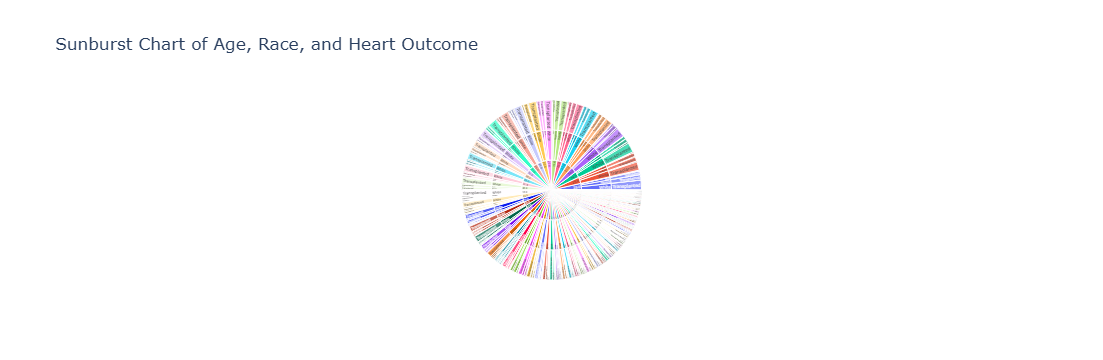

In [50]:
#32 Create a sunburst chart of age, race and any one outcome

# Load data
df_donardetails = pd.read_excel('OrganDonor_Consolidated.xlsx')
dataframe_outcomes = pd.read_excel('OrganDonor_Consolidated.xlsx', sheet_name='Outcomes')

# Merge the dataframes based on the 'PatientID' column
merged_data = pd.merge(df_donardetails, dataframe_outcomes, on='PatientID', how='inner')

# Drop rows with missing values in 'age', 'race', or 'outcome_heart'
merged_data_clean = merged_data.dropna(subset=['age', 'race', 'outcome_heart'])

# Group the data by age, race, and outcome_heart, then count the occurrences
grouped_data = merged_data_clean.groupby(['age', 'race', 'outcome_heart']).size().reset_index(name='count')


# Create the sunburst chart
sunburst = px.sunburst(grouped_data, path=['age', 'race', 'outcome_heart'], values='count',
                  title="Sunburst Chart of Age, Race, and Heart Outcome")

# Show the plot

sunburst.show()
